# Determining Life Expectancy in different countries using WHO Dataset

## Dataset 

The dataset contains data of 193 countries drom 2000-2015, collected from WHO. 83% of the data are from devloping countries and 17% from devloped countries. The dataset has- 

Mortality Rates in death per 1000; Immunisation dosages in percentage(%) among 1-year olds; Thinness in percentage(%); Schooling in Number of Years; Human Development Index in terms of income composition of resources which is ranging from 0 to 1; Alcohol consumption in litres; Population in Billion; GDP in USD.

First of all I import all the necessary libraries for data extaction, manipulation and visualisation.

In [1]:
import numpy as np     #Mathematical operations and Linear Algebra
import pandas as pd     #For data manipulation
import matplotlib.pyplot as plt  #For plotting
import seaborn as sns           #For Corellationa and poltting
import warnings            #To ignore warnings
warnings.filterwarnings("ignore")

Now the data set is imported from the directory where I have downloaded and saved it.

In [2]:
df=pd.read_csv(r'C:\Users\iamab\Documents\Jupyter Notebook\Life Expectency\Life Expectancy Data.csv')

The data set is downloaded from kaggle, where the dataset was collected from WHO. Link for the dataset - https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who/download?datasetVersionNumber=1

A glimpse of the data-

In [3]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
df.shape

(2938, 22)

We are working with 2938 rows each having 22 values. Now I proceed for data exploratoion and cleaning.

## Data Exploration and Cleaning

First of all, I explore the dataset by plotting the count of different features within the dataset. In order to keep the number of plots limited, I have only plotted three features and their count in the dataset. The dataset has data from 2000-2015.

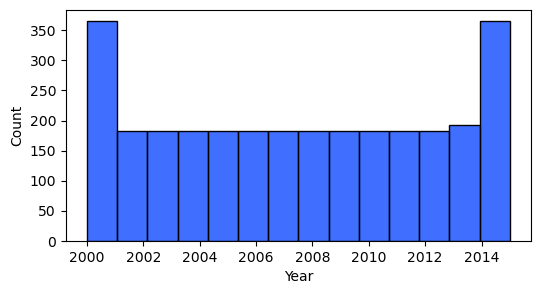

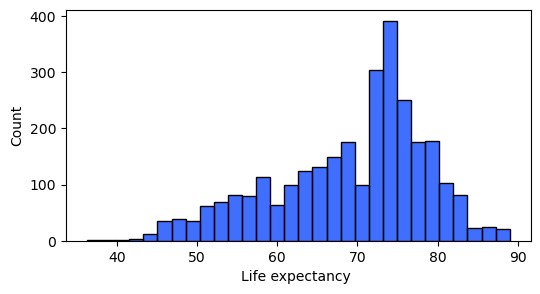

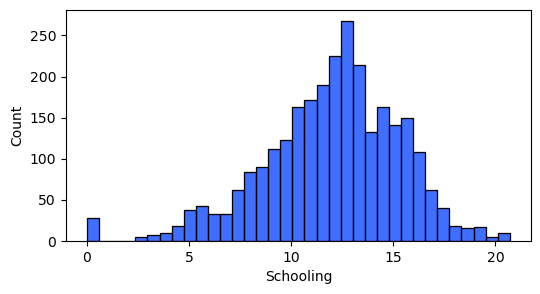

In [5]:
plt.style.use('seaborn-bright')
fig=sns.histplot(df['Year'],stat='count')
fig.figure.set_size_inches(6,3)
plt.show()
fig=sns.histplot(df['Life expectancy '])
fig.figure.set_size_inches(6,3)
plt.show()
fig=sns.histplot(df['Schooling'])
fig.figure.set_size_inches(6,3)
plt.show()

Now, I try to find the number of null values in the data set.

In [6]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

As we can see there are several null values. As we are trying to predict the Life expectancy, I cannot fill the data with anything else. So, I drop those rows having 0 values for Life Expectanncy.

In [7]:
df.dropna(subset=['Life expectancy '],inplace=True)
df.shape

(2928, 22)

In this case the best idea is to replace the missiong values with mean value. Thus created a list of missing values form the above list and used 'for' loop to replace null values with mean.

In [8]:
missing_col=['Alcohol', 'Hepatitis B', ' BMI ', 'Polio', 'Total expenditure', 'Diphtheria ', 'GDP', 'Population',
             ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']

In [9]:
for i in missing_col:
    x=df[i].median()
    print("Median of ",i,"is: ",x)
    df[i].fillna(x, inplace=True)
print("\nReplaced null values with these medians. ")

Median of  Alcohol is:  3.77
Median of  Hepatitis B is:  92.0
Median of   BMI  is:  43.349999999999994
Median of  Polio is:  93.0
Median of  Total expenditure is:  5.75
Median of  Diphtheria  is:  93.0
Median of  GDP is:  1764.97387
Median of  Population is:  1391756.5
Median of   thinness  1-19 years is:  3.3
Median of   thinness 5-9 years is:  3.4
Median of  Income composition of resources is:  0.677
Median of  Schooling is:  12.3

Replaced null values with these medians. 


Here I find duplicate values.

In [10]:
df.duplicated().sum() 

0

As there is no duplicate values, we can start data exploration and visualisation.

## Data Visualizaion

I try to draw corellation between data. As to predict the Life Expectancy, we need to find what are the other variables that it depends on. Thus a corellation heatmap is used here.

<Axes: >

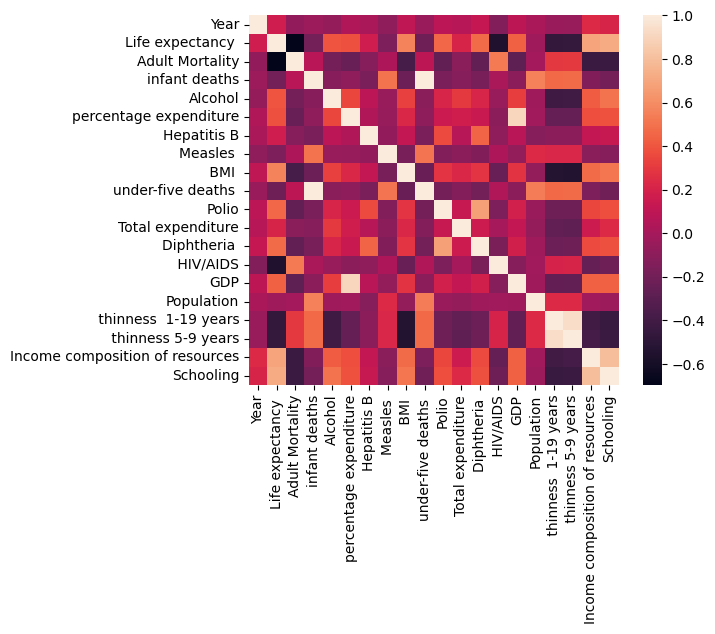

In [11]:
sns.heatmap(df.corr(), square=True)

Here I have selected only a few colums, selected keeping in mind the cerellation heatmap, just to show the dependency of these variables with the Life Expectancy and to keep the number of plots limited.

In [12]:
selected_col=df[['Schooling','Polio','GDP','Adult Mortality', 'percentage expenditure']]

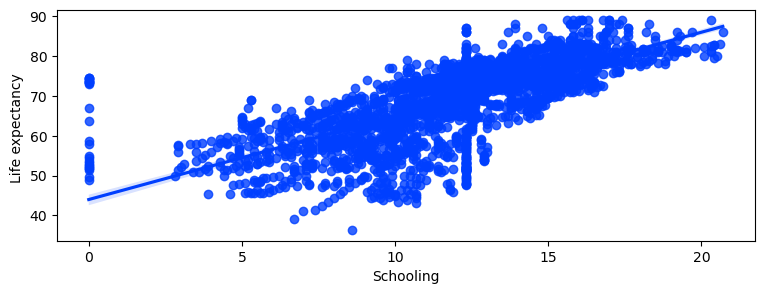

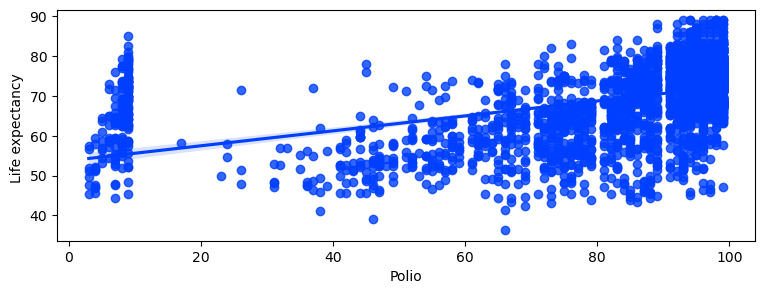

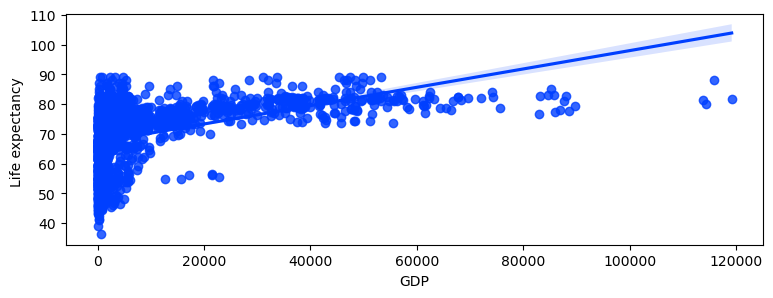

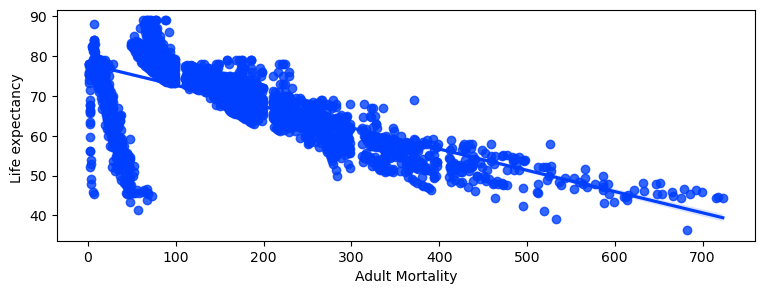

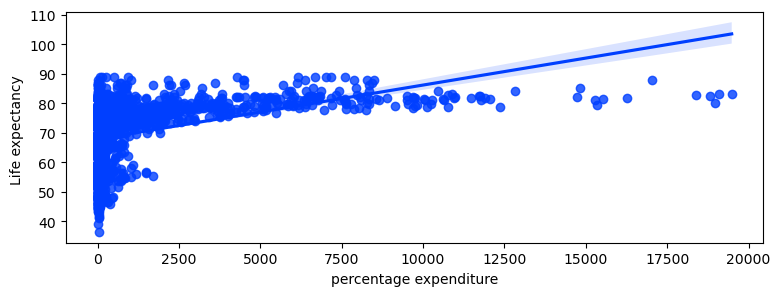

In [13]:
for i in selected_col:
    fig=sns.regplot(x=i, y='Life expectancy ', data=df)
    fig.figure.set_size_inches(9,3)
    plt.show()

We see a general trend in the data. Incerased Mortality decreses the Life Expectancy, which is obvious. On the otherhand percentage of expenditure, GDP, Polio Dosages and especially Schooling increses life expectancy. 

## Feature and Target Selection

Now I select which the feature column i.e. the column data, on which models will be trained and the target column, which is the column values to be predicted. But, first I check the data types. The numerical data will be trained in regression models.

In [14]:
df.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

Here I select the features and target.

In [15]:
features= df[['Year', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure','Hepatitis B', 'Measles ',
              ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', 
              ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']]

target = df['Life expectancy ']

Data for training the model and data for testing is split from the dataframe.

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,target,test_size=0.20,random_state=1)

Taken 80% of data for training and 20% for testing.

## Model Training and Testing

In this sub-section I train three Machine-Learning models to train using the data set and test the predictions given by them and also the accuracy. The models that I chose are :- 

Multiple Linear Regression, Polynomial Regression and K-Nearest Neighbours Regressor 

I chose them due to their simplicity, which enables us to understand the how the mathematics behind all such algorithms performs to give a prediction with remarkable accuracy, which seems nothing short of wizardry.

### Linear Regression: 

At first I test the simplest of the models Linear Regression. I import the model from sklearn. Here, I also import all the error metrics for all the models.

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

Created a function to give all the error metrices together.

In [18]:
def model_performance(true, predicted):
    mae=mean_absolute_error(true, predicted)
    mse=mean_squared_error(true, predicted)
    rmse=np.sqrt(mean_squared_error(true, predicted))
    r2=r2_score(true, predicted)
    return mae, rmse, r2

Created a class for linear regression to fit and predict values.

In [19]:
linReg=LinearRegression()
linReg.fit(X_train,y_train)

LinearRegression()

In [20]:
#Predict a value
y_lin_pred=linReg.predict(X_test)

In [21]:
mae, rmse, r2= model_performance(y_test, y_lin_pred)
print ("Linear Regression Performance: \n")
print("RMSE: ",rmse)
print("MAE: ",mae)
print("R2 Score: ",r2*100)

Linear Regression Performance: 

RMSE:  4.068969134333779
MAE:  2.9538464706255554
R2 Score:  81.30521893971085


In [22]:
y_test

2204    73.0
192     71.8
2413    55.4
45      71.6
2484    68.3
        ... 
2015    74.0
605     59.5
1542    88.0
2175    74.1
573     72.7
Name: Life expectancy , Length: 586, dtype: float64

To predict a single value.

In [23]:
#predict a value
linReg.predict(X_test.iloc[0].values.reshape(1,19))

array([70.66059967])

Now we dentermine the intercept and coefficient of the best fitted regression line.

In [24]:
linReg.coef_

array([-2.30000334e-02, -1.93470219e-02,  1.00757188e-01,  1.05480039e-01,
        6.94245615e-05, -1.57329857e-02, -2.14008541e-05,  4.37693621e-02,
       -7.47760311e-02,  3.07468415e-02,  5.89525340e-02,  3.76654496e-02,
       -4.84939751e-01,  4.63498598e-05, -1.04898253e-10, -6.60009643e-02,
       -5.19169663e-02,  5.77054584e+00,  7.15667981e-01])

In [25]:
linReg.intercept_

100.73744228917943

Saving the r2 score for later comparions.

In [26]:
lin_r2=r2_score(y_test, y_lin_pred)

## Polynomial Regression

To get the best fit curve, we have to check which degree of polynomial gives the best fit curve. Thus I have compared the r2 score for different degree of polynomials and plotted that.
Note: Due to long execution time, I limited degree upto 4. Still we can see that the accuracy decreses dramatically thus degree 2 is a suitable value for it. 

I do the same thing for polynomial regression by importing from sklearn.

In [27]:
from sklearn.preprocessing import PolynomialFeatures

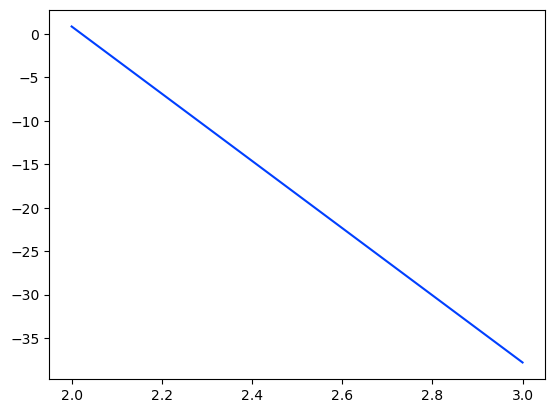

In [28]:
pol_scores=[]
for i in range(2,4):
    pol=PolynomialFeatures(degree=i)
    X_pol_train=pol.fit_transform(X_train)
    X_pol_test=pol.fit_transform(X_test)
    linReg.fit(X_pol_train, y_train)
    y_pol_pred=linReg.predict(X_pol_test)
    pol_scores.append(r2_score(y_test, y_pol_pred))
plt.plot(range(2,4), pol_scores)

We see polynomial of degree 2 is the best fitting curve.

Training and predicting here. The way it does polynomial regression, is just transform the training data by including powers of input features upto specified degree. Then is uses the multiple linear regression to train that data including polynomial terms.

In [29]:
pol=PolynomialFeatures(degree=2)
X_pol_train=pol.fit_transform(X_train)
X_pol_test=pol.transform(X_test)

In [30]:
linReg.fit(X_pol_train, y_train)

LinearRegression()

In [31]:
y_pol_pred=linReg.predict(X_pol_test)

In [32]:
mae, rmse, r2= model_performance(y_test, y_pol_pred)
print ("Polynomial Regression Performance: \n")
print("RMSE: ",rmse)
print("MAE: ",mae)
print("R2 Score: ",r2*100)

Polynomial Regression Performance: 

RMSE:  3.3618580203334254
MAE:  2.2432749079979555
R2 Score:  87.23824717605045


In [33]:
#predict a value
linReg.predict(X_pol_test[0].reshape(1,210))

array([74.63817583])

In [34]:
#linReg.coef_

In [35]:
linReg.intercept_

80.58055634460393

Error scores for Polynomial Regression-

I again show the coefficients and Intercepts for best fitted curve in Polynimial Regression. 

In [36]:
pol_r2=r2_score(y_test, y_pol_pred)

## K-Nearest Neighbours Regressor

The last model I am going to use is K-Nearest Neighbours Regressor. This model selects the closest K neighbours form the test data point and assigns the average values of all the neighbours to the data point in question. But there is a problem. If all the neighbour data points have different units, then the distance between the neighbouring points get inaccurate as a larger unit would involve larger distances than the smaller ones. Thus the approach is to scale all the data within same range so that the distances stay uniform. Thus we proceed with scaling first.

### Scaling for KNN

I import the scaling functions from sklearn and use them to scale the features and store them in other variables.

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

In [38]:
scaler=StandardScaler()
X_knn_train=scaler.fit_transform(X_train)
X_knn_test=scaler.transform(X_test)

The accuracy of the model obviously depends on how many neighbours I am considering. Thus I have shown a plot of R2 for different neighbours and can choose the number of neighbour best suited for the dataset.

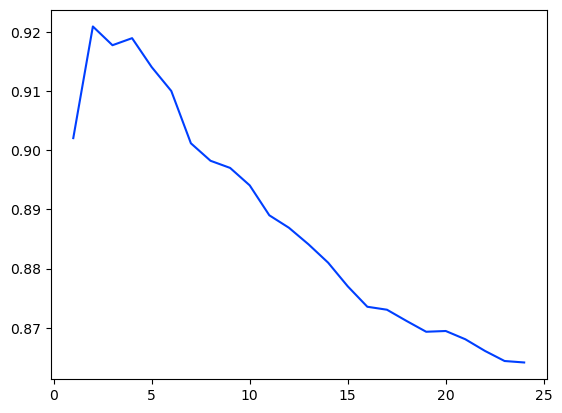

In [39]:
knn_scores=[]
for i in range(1,25):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_knn_train, y_train)
    y_knn_pred=knn.predict(X_knn_test)
    knn_scores.append(r2_score(y_test, y_knn_pred))
plt.plot(range(1,25), knn_scores)

As we can see that taking 2 neighbours gives the best accuracy.

In [40]:
knn=KNeighborsRegressor(n_neighbors=2)
knn.fit(X_knn_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [41]:
y_knn_pred=knn.predict(X_knn_test)

In [42]:
mae, rmse, r2= model_performance(y_test, y_knn_pred)
print ("K-Nearest Neighbours Regressor Performance: \n")
print("RMSE: ",rmse)
print("MAE: ",mae)
print("R2 Score: ",r2*100)

K-Nearest Neighbours Regressor Performance: 

RMSE:  2.6464058955161294
MAE:  1.6726962457337884
R2 Score:  92.09203928484717


In [43]:
#Predict a value
knn.predict(X_knn_test[0].reshape(1,19))

array([69.9])

In [44]:
knn_r2=r2_score(y_test, y_knn_pred)

## Model Comparison

I have compared the performance i.e the accuracy of the models below.

In [45]:
x=['Linear', 'Polynomial', 'KNN']
y=[lin_r2, pol_r2, knn_r2]

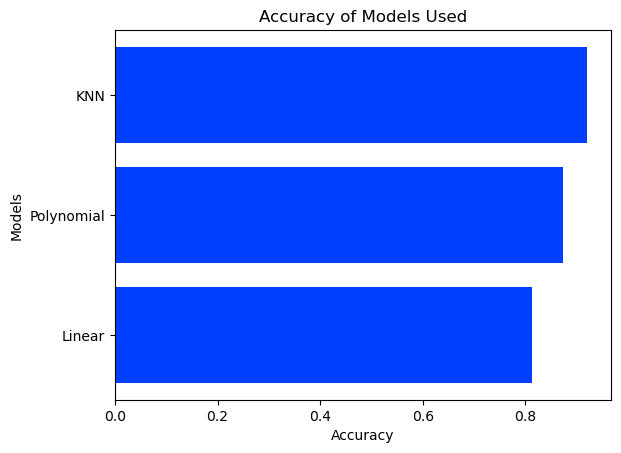

In [46]:
plt.barh(x,y)
plt.rcParams["figure.figsize"] = (9,4)
plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.title('Accuracy of Models Used')
plt.show()

## Conslusion

It is evident that, for such a  simple model, the accuracy of the K-Nearest Neighbour model with 2 neighbours, is the best among all the models I have used. It has an accuracy of about 92%. It can thus be used to prodict life expectancy of a country pretty accurately. As a result better actions and resource allocations can be done to improve the conditions of that country. Such data can also prove to be valuable to Insurance companies.

A remarkable point to note is the prediction of the Linear Regression model. The simplest model could provide very accurate result for the dataset. 

A particluar result that surprised me was the extent upto which Schooling and especially Education improves the life expectancy of human beings in a country. Schooling was shown to have high positive correlation with life-span. This again shows the importance of education. It elevates a human being and improves the quality of life in every possible way, which might initially seem uncorrelated. 

## Further Possible Improvements

Even though the models are performing pretty accurately, further improvements are always possible. As an example, a cleaner data may give better results. Some values like BMI are not explained well and might not be very accurate. Thus a more accurate data could predict the real situation better.